# The Titanic Dataset EDA
## Description
In this notebook we delve into the Titanic dataset to uncover insignts about the factors that influenced passanger survival rates. Through a series of visualizations and statistical analysis we explore the impact of socio_economic status, gender and age on survival outcomes

In [20]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# reading the titanic csv file into a variable called data and diplaying the first five rows of the dataset
data = pd.read_csv('titanic.csv')

# data preview of the first five columns
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


## Data understanding


### Data set Overview


In [22]:
def df_desc(df):
    """ 
    This function takes a dataframe as performs basic descriptive operations like 
    description for both numeric and non-numeric columns, it checks the size and shape of the 
    dataset and provides the columnn names
    """
    # Prints shape of the dataset
    print('The dataset has the following number of rows and columns:', df.shape)
    
    # Prints column names
    print('Columns in the dataset:')
    print(df.columns)
    
    # Prints descriptive statistics of the dataset
    print('\nDescriptive statistics:')
    print(df.describe())

    # printing decription for object columns
    print('\nDescription for object columns:')
    print(df.describe(include =  ['O']))

In [23]:
df_desc(data)

The dataset has the following number of rows and columns: (1391, 12)
Columns in the dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Descriptive statistics:
       PassengerId     Survived          Age        SibSp        Parch  \
count  1391.000000  1391.000000  1209.000000  1391.000000  1391.000000   
mean    527.020848     0.381021    29.731894     1.399712     1.141625   
std     307.457244     0.485812    16.070125     2.097919     1.771294   
min       1.000000     0.000000     0.420000     0.000000     0.000000   
25%     248.500000     0.000000    20.000000     0.000000     0.000000   
50%     596.000000     0.000000    27.000000     1.000000     0.000000   
75%     839.000000     1.000000    40.000000     2.000000     2.000000   
max     891.000000     1.000000    80.000000     8.000000     6.000000   

              Fare  
count  1391.000000  
mean     32.145048  

- Rows: 1391 (representing passengers)
- Columns: 12 (representing the variables that may contribute to survival prediction)
 

In [24]:
# consice summary of the dataset showing the total rows and columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1391 non-null   float64
 1   Survived     1391 non-null   float64
 2   Pclass       1391 non-null   object 
 3   Name         1391 non-null   object 
 4   Sex          1391 non-null   object 
 5   Age          1209 non-null   float64
 6   SibSp        1391 non-null   float64
 7   Parch        1391 non-null   float64
 8   Ticket       1391 non-null   object 
 9   Fare         1391 non-null   float64
 10  Cabin        602 non-null    object 
 11  Embarked     1289 non-null   object 
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


- The following columns have missing values: Age, Cabin and Embarked

In [25]:
# checking for duplicates
data.duplicated().sum()

100

- We have 100 duplicated rows in our dataset

In [26]:
# droping duplicates 
data.drop_duplicates(keep='first', inplace=True)

In [27]:
# checking percentage null for each column
data.isna().sum()/len(data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            14.097599
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          53.369481
Embarked        7.900852
dtype: float64

- Age - About 14.10% of the entries in the age column are missing. Age could be an important factor in our analysis so we are going to fill the missing values with the mean age
- Cabin -  this column has a high percentage of missing values so we are going to drop it
- Embarked - with a low percentage of missing values we are going to impute the missing values with the mode given that the column contains non numeric values
- Additionally we are going to drop the following colums because they might not be useful for our analysis 

In [28]:
# filling the missing values in the age column with mean
data.Age.fillna(data.Age.mean(), inplace= True)

# filling missing values in Embacked column with the mode of the column
data.Embarked.fillna(data.Embarked.mode()[0], inplace= True)

# Dropping columns

data.drop(columns= ['Cabin', 'PassengerId', 'Ticket', 'Name'], inplace=True)

In [29]:
#changing the Age column dataType to integer
data.Age = data.Age.astype(int)

In [30]:
# stattistics summary of the dataframe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,1291.0,0.410534,0.492121,0.0,0.00,0.0000,1.0,1.0000
Age,1291.0,30.319907,15.415659,0.0,21.00,30.0000,39.0,80.0000
SibSp,1291.0,1.430674,2.174651,0.0,0.00,0.0000,2.0,8.0000
Parch,1291.0,1.230054,1.808823,0.0,0.00,0.0000,2.0,6.0000
Fare,1291.0,34.073402,49.998113,0.0,8.05,15.2458,35.5,512.3292


- The age column has an instace where age is Zero. this Does not feel correct

In [31]:
zero_age_count = (data['Age'] == 0).sum()
print(f"Number of entries where age is zero are: {zero_age_count}")

Number of entries where age is zero are: 30


# Data visualization

-  The Boxplot will help us clearly see the distribution of outliers in the numerical variables

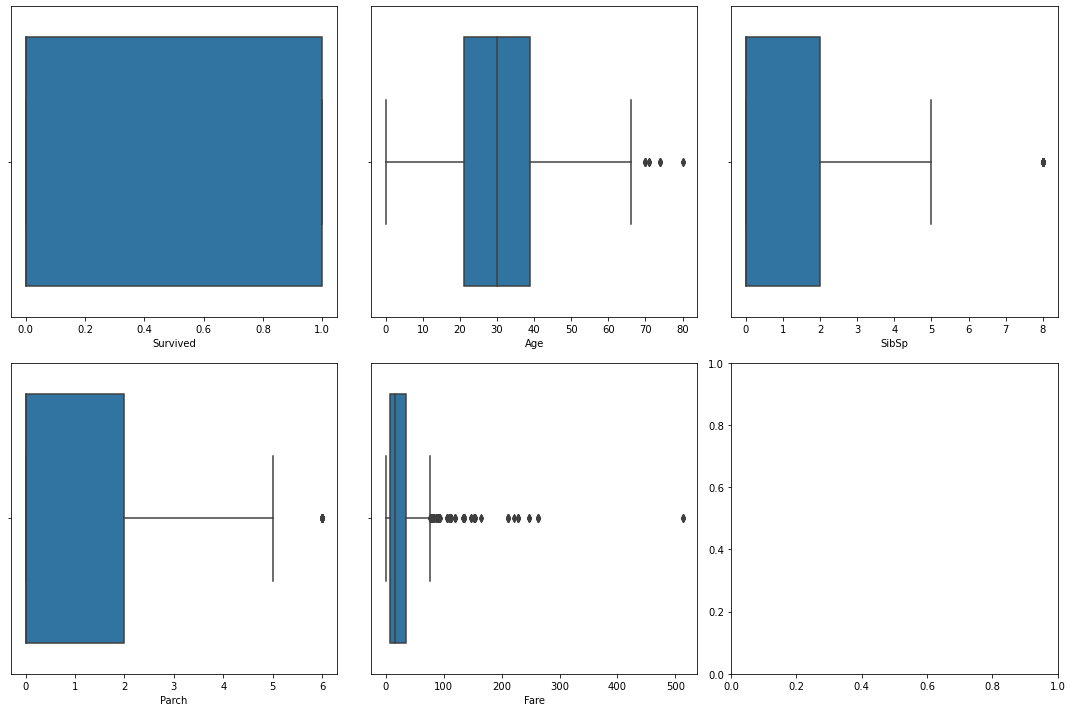

In [36]:
# Select only numerical columns
numerical_cols = data.select_dtypes('number').columns

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    # Calculate the row and column index of the subplots
    row = i // 3
    col_num = i % 3

    sns.boxplot(data=data, x=col, ax=ax[row, col_num])

plt.tight_layout()
plt.show()

- Although the Survived column consist of numerical values, it represent diffrent categories respectively thats why they do not have outliers.
- The Age, SibSp and Parch columns have significant number of outliers but we will not remove them becaouse they are realistic as they represent real world data and do not seem to extreme
- The outlires in the fare column are extreme therefore we continue to analyse them.

In [38]:
# Removing outlier in teh fare coloumn
low, high = data.Fare.quantile([0.01, 0.99])
remove_outlier = data.Fare.between(low,high)

data = data[remove_outlier]

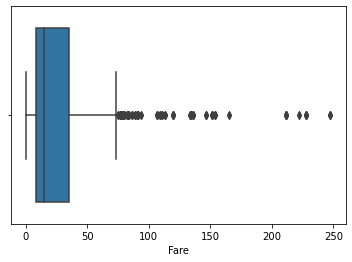

In [40]:
#ploting box plot for Fare column
sns.boxplot(data=data, x ='Fare')
plt.show()

## Univariate analysis

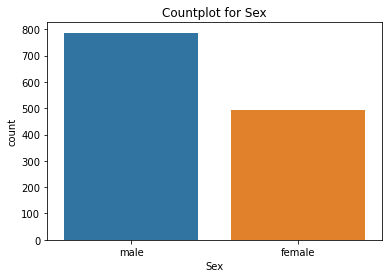

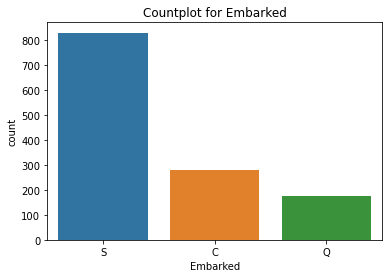

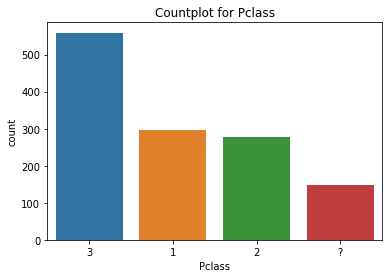

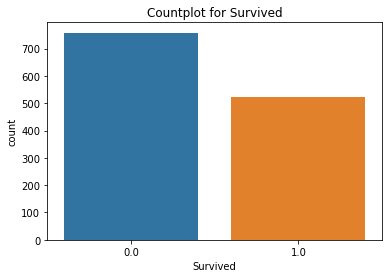

In [41]:
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Survived']

for col in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data =  data, x = col)
  plt.title(f'Countplot for {col}')
  plt.show()

**observations**


Graph 1:
- The majority of Passengers were male with a count of close to 600

Graph 2:
- Most of the passengers embarked/boarded from the Southampton port

Graph 3:
- Most passengers travelled using third class which was the lowest class.

Graph 4:
- It represents the Servival of passengers and we can see that most of the passengers did not survive

In [2]:
#Distribution of diffrent agge groups that boarded the titanic
plt.figure(figsize=(10,6))
sns.histplot(data =  data, x= 'Age', kde=True)
plt.show()

NameError: name 'plt' is not defined

**Observations**

It shows that young people between the age of 20 -30 were the most represented age group

### Bivariate Analysis

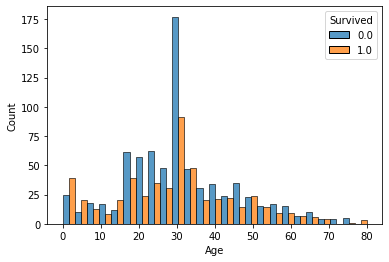

In [47]:
#the survival rate of diffrent age groups
sns.histplot(data=data, x= 'Age', hue='Survived', multiple='dodge');

In [1]:
#the survival rate comparison of sex and age group
sns.histplot(data=data, x= 'Age', hue='Sex', multiple='dodge');

NameError: name 'sns' is not defined